# Implementing a digit recognizer model using Pytorch.

# Importing Libraries

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data Loading: Load the MNIST dataset using data loading utilities.

In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Model Definition: Creating a neural network model for digit recognition.

In [26]:

class DigitRecognizer(nn.Module):
    def __init__(self):
        super(DigitRecognizer, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = DigitRecognizer()


# Training: Training model on the training set of the MNIST dataset by using an appropriate loss function and optimizer.

In [27]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

# Validation: Evaluate the performance of your model on a separate validation set

In [28]:
def validate(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Validation set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)')
    return test_loss, accuracy

# Testing: Test your trained model on a test set that was not used during training or validation.

In [29]:
epochs = 5
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, criterion, epoch)
    validate(model, test_loader, criterion)

# Testing
def test(model, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Test set: Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)')
    return accuracy

test_accuracy = test(model, test_loader)

Train Epoch: 1 [0/60000] Loss: 2.336874
Train Epoch: 1 [6400/60000] Loss: 0.454898
Train Epoch: 1 [12800/60000] Loss: 0.213599
Train Epoch: 1 [19200/60000] Loss: 0.327642
Train Epoch: 1 [25600/60000] Loss: 0.105208
Train Epoch: 1 [32000/60000] Loss: 0.213991
Train Epoch: 1 [38400/60000] Loss: 0.135149
Train Epoch: 1 [44800/60000] Loss: 0.098676
Train Epoch: 1 [51200/60000] Loss: 0.206730
Train Epoch: 1 [57600/60000] Loss: 0.062729
Validation set: Average loss: 0.0001, Accuracy: 9604/10000 (96%)
Train Epoch: 2 [0/60000] Loss: 0.134768
Train Epoch: 2 [6400/60000] Loss: 0.214197
Train Epoch: 2 [12800/60000] Loss: 0.107672
Train Epoch: 2 [19200/60000] Loss: 0.147513
Train Epoch: 2 [25600/60000] Loss: 0.178202
Train Epoch: 2 [32000/60000] Loss: 0.222769
Train Epoch: 2 [38400/60000] Loss: 0.048112
Train Epoch: 2 [44800/60000] Loss: 0.076075
Train Epoch: 2 [51200/60000] Loss: 0.161283
Train Epoch: 2 [57600/60000] Loss: 0.087695
Validation set: Average loss: 0.0001, Accuracy: 9682/10000 (97%)


# Visualize a few input images along with their corresponding predicted and actual labels.

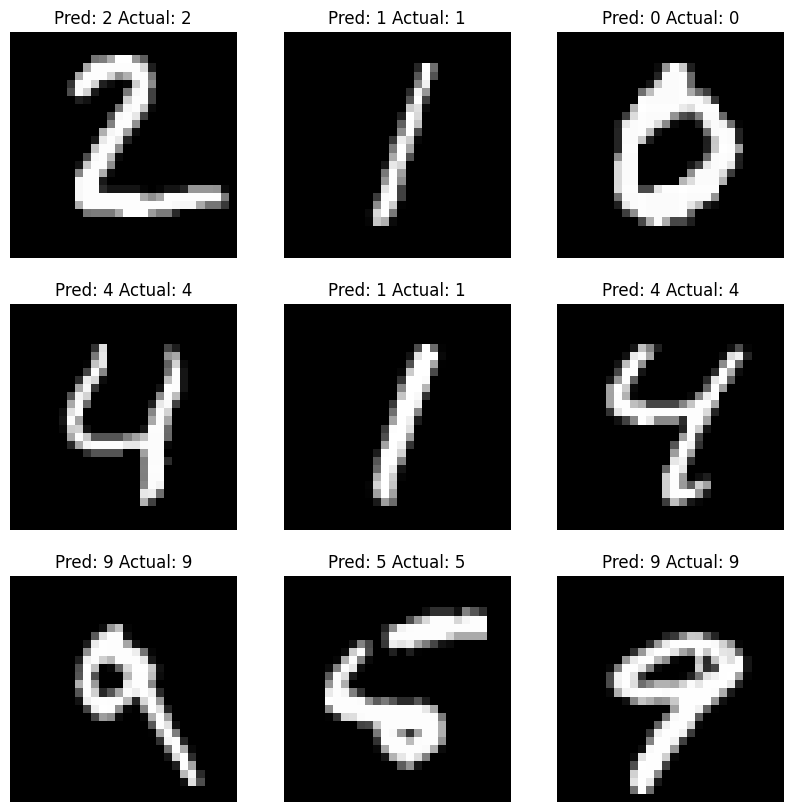

In [30]:
def visualize_predictions(model, test_loader):
    model.eval()
    data, target = next(iter(test_loader))
    output = model(data)
    pred = output.argmax(dim=1, keepdim=True)

    fig = plt.figure(figsize=(10, 10))
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        plt.axis('off')
        plt.imshow(data[i].numpy().squeeze(), cmap='gray')
        plt.title(f'Pred: {pred[i].item()} Actual: {target[i].item()}')
    plt.show()

visualize_predictions(model, test_loader)